In [1]:
library("ape")
library("geiger")
library("phytools")
library("nlme")
library("evomap")
library("phylolm")
library("adephylo")

Le chargement a nécessité le package : phytools

Le chargement a nécessité le package : maps

Le chargement a nécessité le package : ade4



In [44]:
df<-read.csv("complete_table_no_correction.tsv", sep="\t") # omit sep ="\t" for .csv files
phy<-read.tree("MURID_MCC_morpho.tre")

In [45]:
df<-df[-c(8,10),]
phy<-drop.tip(phy, c("Chiropodomys_gliroides", "Chiropodomys_major"))

In [46]:
source("functions.R")

In [47]:
extract.group<-function(tree, data_frame, group1){
vec_gr1<-c()
vec_gr2<-c()
    for (i in 1:nrow(data_frame)){
        if(data_frame[i,3]==group1){
            vec_gr1<-c(vec_gr1, which(phy$tip.label==data_frame[i,2]))
        }
        else{
            vec_gr2<-c(vec_gr2, which(phy$tip.label==data_frame[i,2]))
        }
    }
    return(list(vec_gr1, vec_gr2))
}

In [48]:
AICc<-function(model, tree){
AICc_value <- -2 * model$logLik + (2 * as.numeric(model$p) * (length(tree$tip.label)/(length(tree$tip.label) - as.numeric(model$p) - 1)))
return(AICc_value)
}

In [49]:
temp_data<-df[,c(9, 10)]

pancova<-function(temp_data, phy){

print(colnames(temp_data)[1])
    
temp_data[,1]<-log(temp_data[,1])

rownames(temp_data)<-df[,2]
colnames(temp_data)<-c("Dependent","Independent")

####################################################
#Case study 1: Platyrrhines versus Catarrhines

#Set groups to be compared
      Non_p<-unlist(extract.group(phy, df, "N")[1])
      P<-unlist(extract.group(phy, df, "N")[2])

#Plot the two groups being compared
      plot(temp_data$Dependent~temp_data$Independent,col="white",pch=19,xlab="", ylab="",asp=1,cex.lab=2)
      pGLS.plotGrade("Dependent","Independent",temp_data,phy,model="BM",group=Non_p,col="#838b8b",lwd=5,cex=1,pch=19)
      pGLS.plotGrade("Dependent","Independent",temp_data,phy,model="BM",group=P,col="#9acd32",lwd=5,cex=1,pch=19)

#Highlight them in the tree to double check
      tipCol<-rep("#9acd32",length(phy$tip.label))
      tipCol[Non_p]<-"#838b8b"
      plot(phy,tip.col=tipCol,cex=0.6)

#Prepare group allocation variables
#For differences in slope:
      grpS<-rep("XXXXX",length(rownames(temp_data)))
      grpS[P]<-"A"
      grpS[Non_p]<-"B"
      grpS<-as.factor(grpS)
      names(grpS)<-rownames(temp_data)
#For differences in intercept:
      grpI<-rep("A",length(rownames(temp_data)))
      grpI[Non_p]<-"B"
      grpI<-as.factor(grpI)
      names(grpI)<-rownames(temp_data)



Model<-model.matrix(as.formula(Dependent~Independent),temp_data)

Model_ML_Null<-phylolm(as.formula(Dependent~Independent),temp_data,phy=phy,model="BM")

Model_ML_I<-phylolm(as.formula(Dependent~grpS:Independent),temp_data,phy=phy,model="BM")
Model_ML_S<-phylolm(as.formula(Dependent~grpI + Independent),temp_data,phy=phy,model="BM")
Model_ML_SI<-phylolm(as.formula(Dependent~grpI + grpS:Independent),temp_data,phy=phy,model="BM")

AICs<-c(AICc(Model_ML_Null,phy),AICc(Model_ML_I,phy), AICc(Model_ML_S,phy), AICc(Model_ML_SI,phy))
names(AICs)<-c("model_Null","model_I","model_S","model_SI")
print(aicw(AICs))
}

[1] "RImean_all"


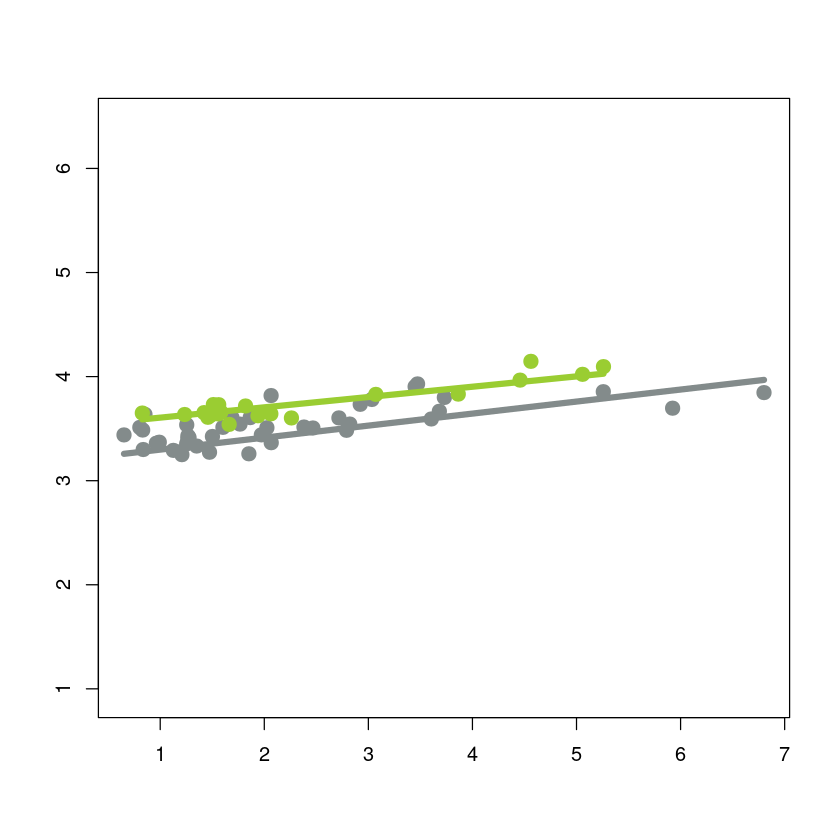

                 fit    delta         w
model_Null -68.55256 0.000000 0.4900708
model_I    -66.34081 2.211756 0.1621744
model_S    -66.49053 2.062033 0.1747810
model_SI   -66.46974 2.082818 0.1729739
[1] "RImean_distal"


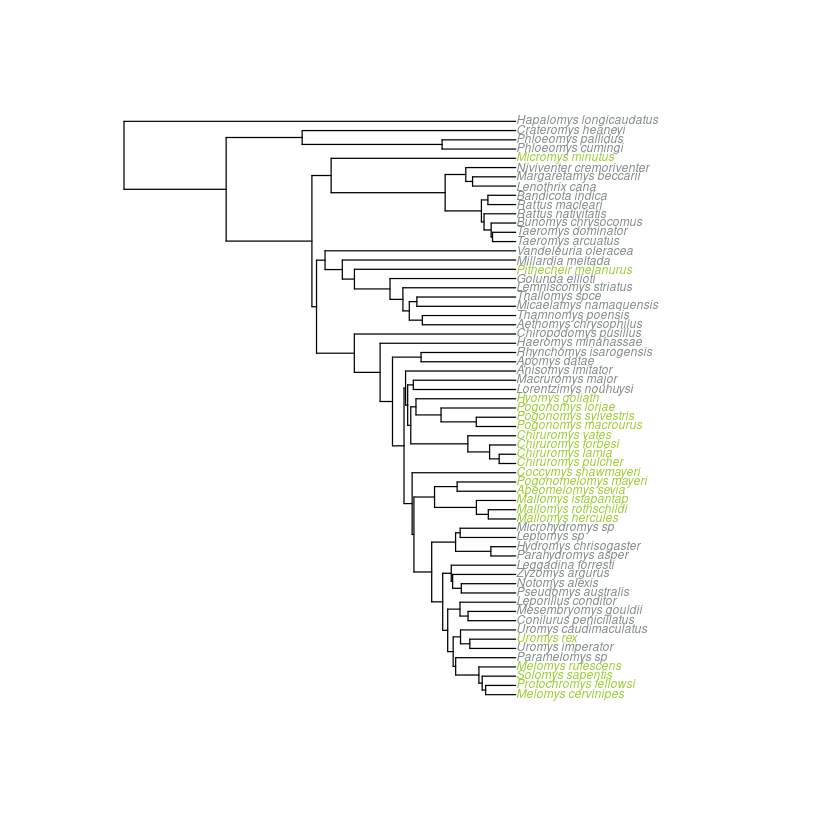

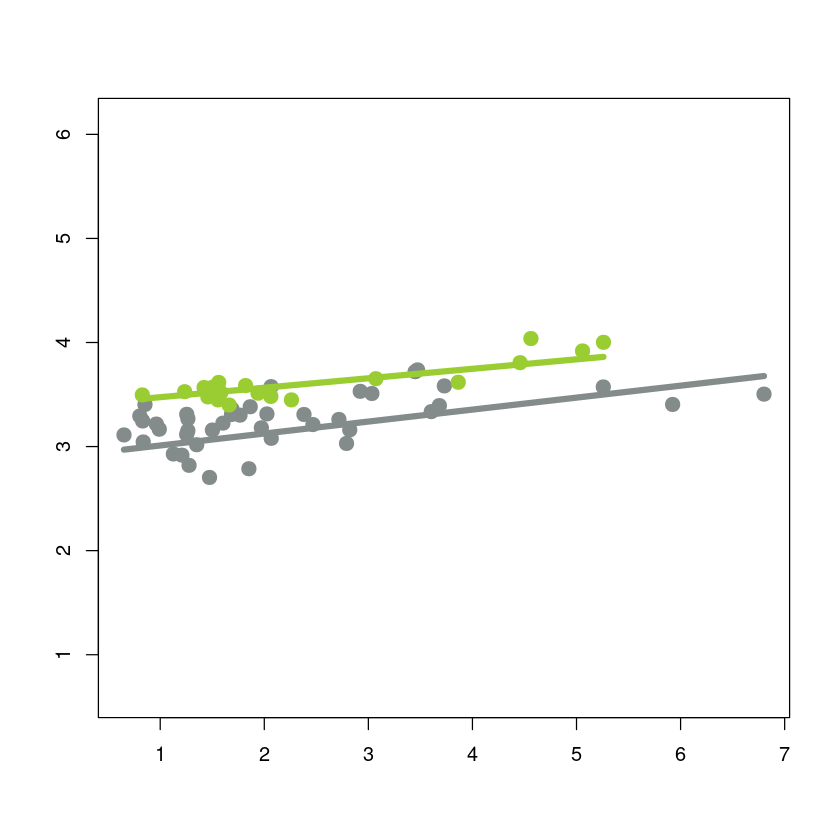

                 fit    delta         w
model_Null -13.74043 0.000000 0.5298183
model_I    -11.50648 2.233952 0.1733926
model_S    -11.59040 2.150029 0.1808232
model_SI   -10.70195 3.038476 0.1159659
[1] "RImean_lastQ"


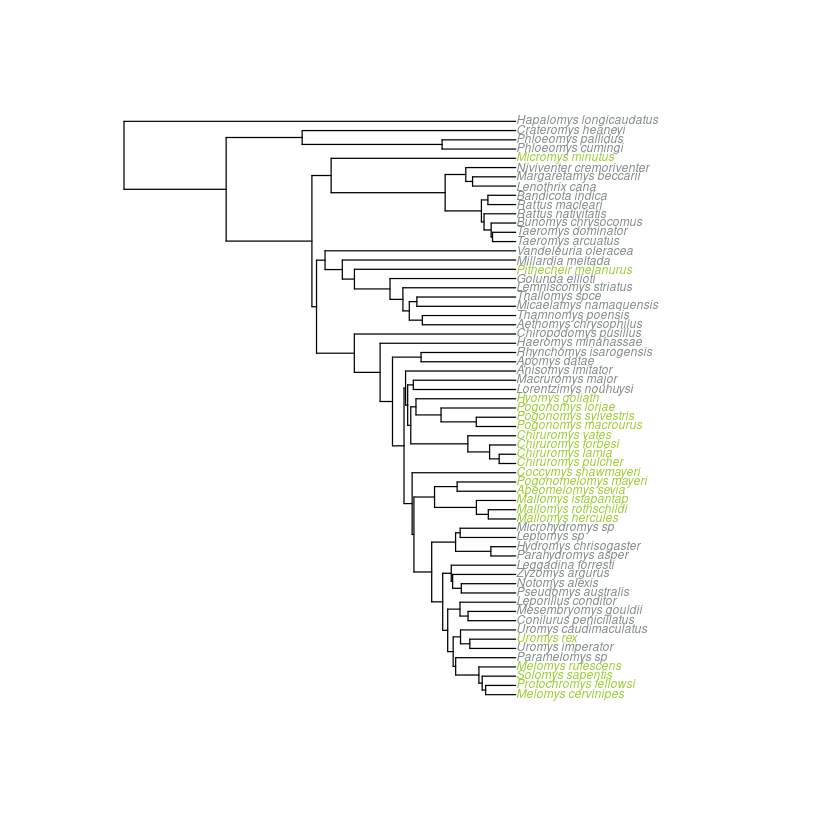

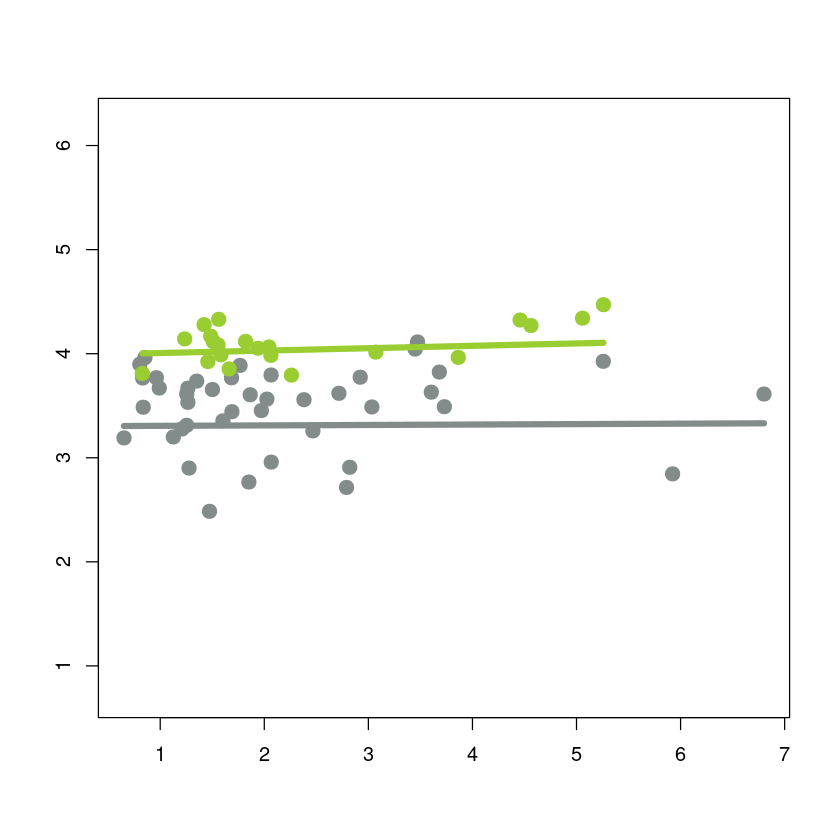

                fit    delta          w
model_Null 65.68310 0.000000 0.56918091
model_I    67.92583 2.242729 0.18545899
model_S    67.96489 2.281787 0.18187226
model_SI   70.06980 4.386700 0.06348783
[1] "TPEImean_all"


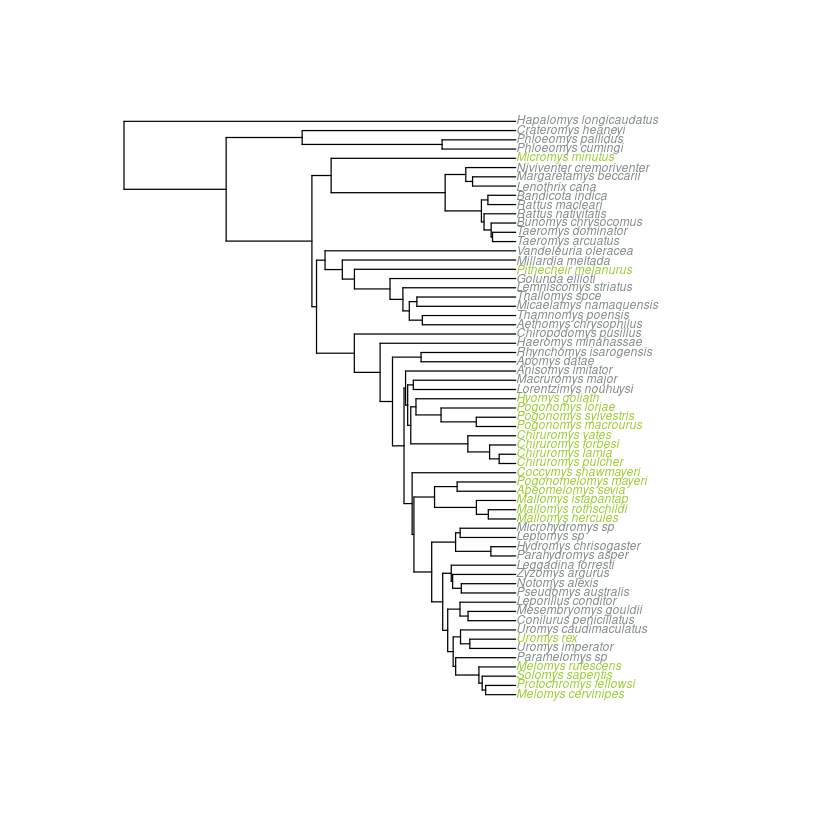

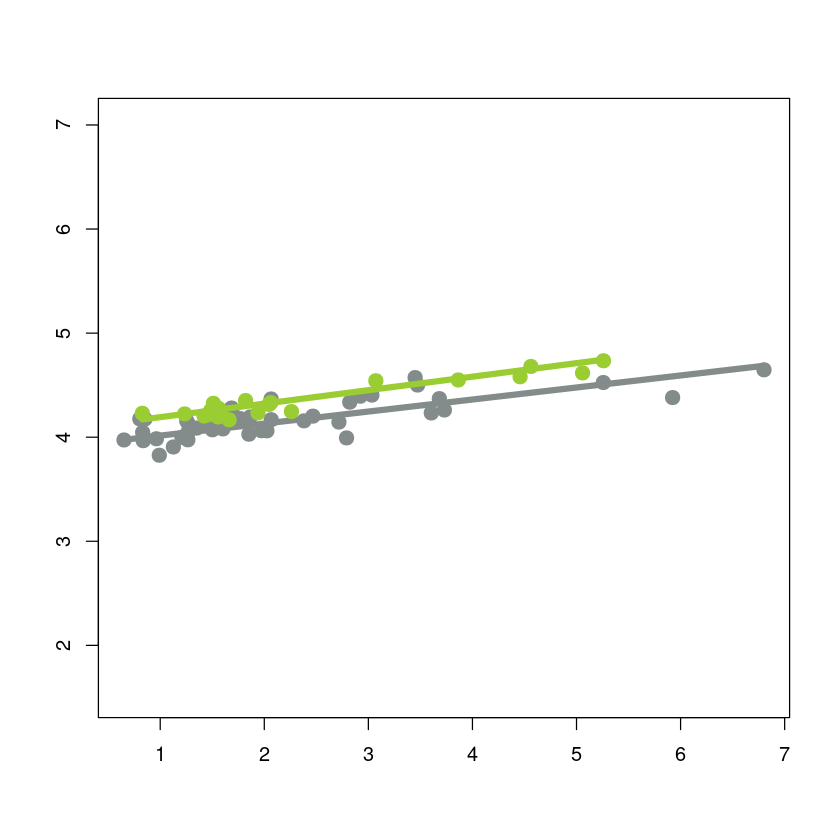

                 fit     delta         w
model_Null -66.89030 0.7356169 0.3129702
model_I    -65.11772 2.5081934 0.1290009
model_S    -64.72351 2.9024074 0.1059230
model_SI   -67.62591 0.0000000 0.4521059
[1] "TPEImean_distal"


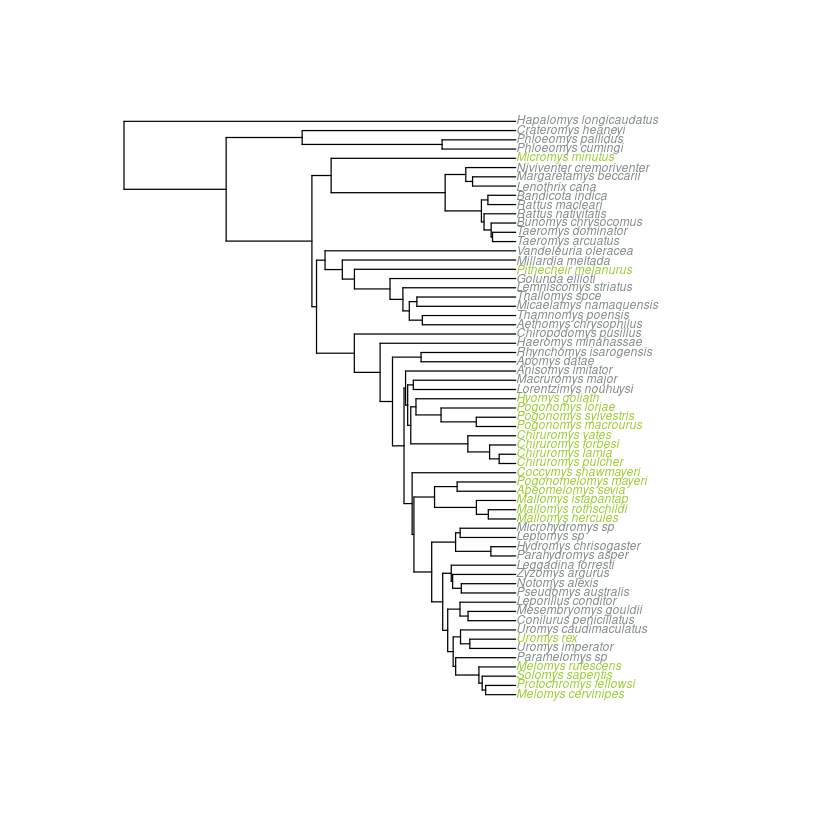

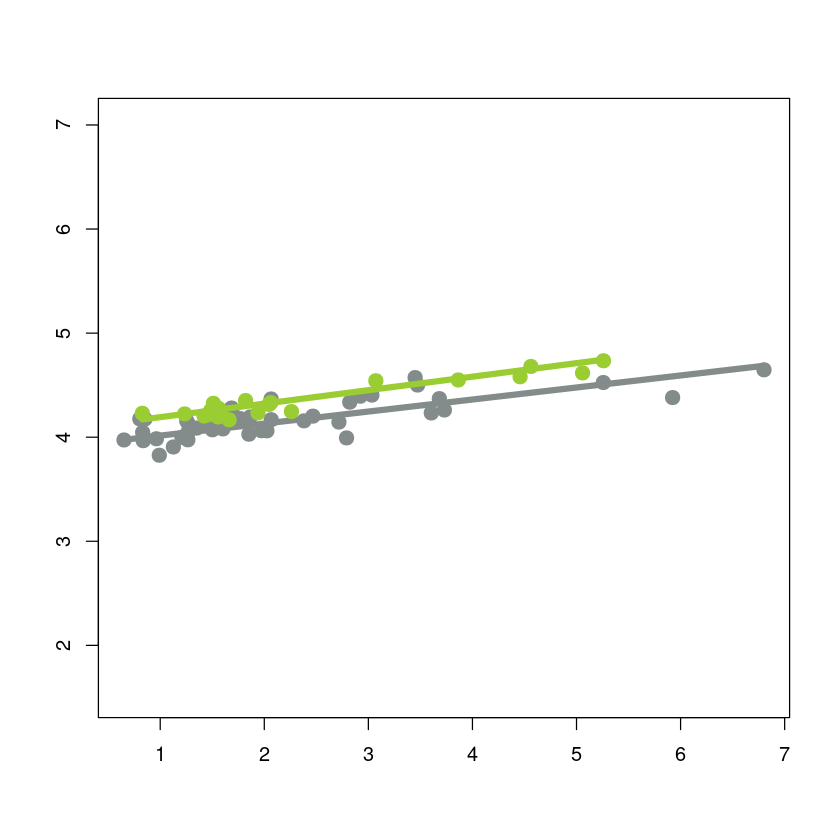

                 fit     delta         w
model_Null -66.89030 0.7356169 0.3129702
model_I    -65.11772 2.5081934 0.1290009
model_S    -64.72351 2.9024074 0.1059230
model_SI   -67.62591 0.0000000 0.4521059
[1] "TPEImean_lastQ"


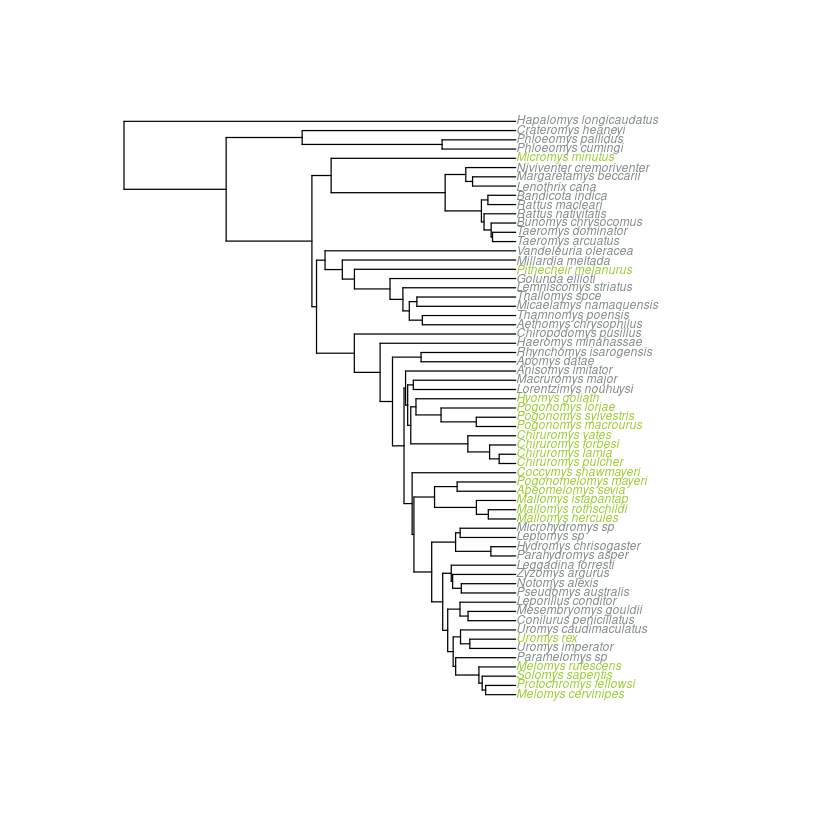

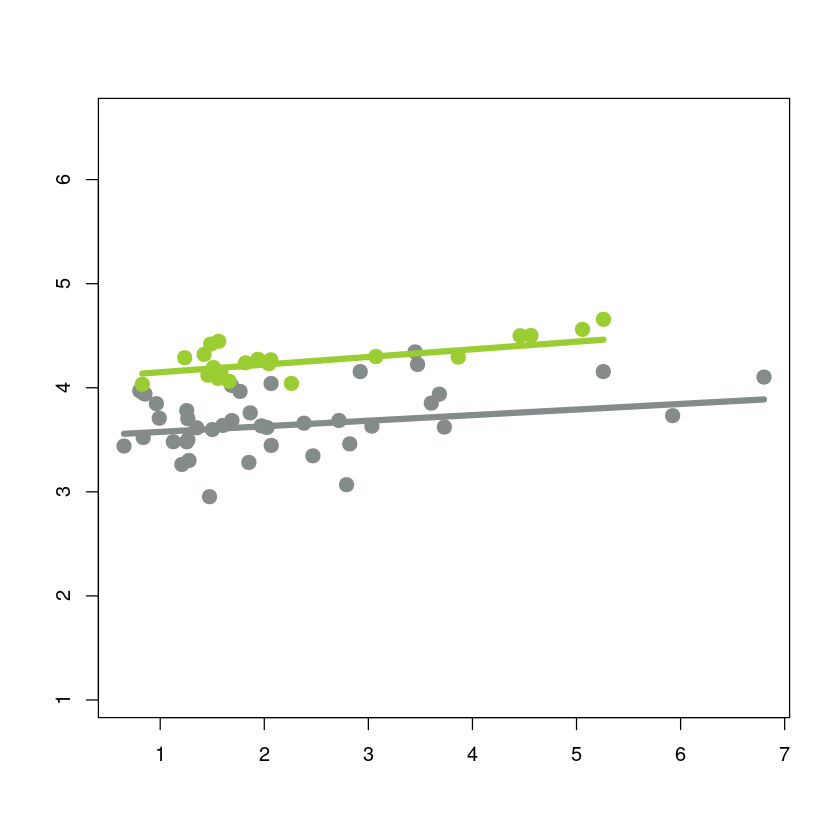

                fit    delta          w
model_Null 44.72127 0.000000 0.53595875
model_I    46.59809 1.876826 0.20969295
model_S    46.88606 2.164797 0.18157320
model_SI   48.71463 3.993367 0.07277509


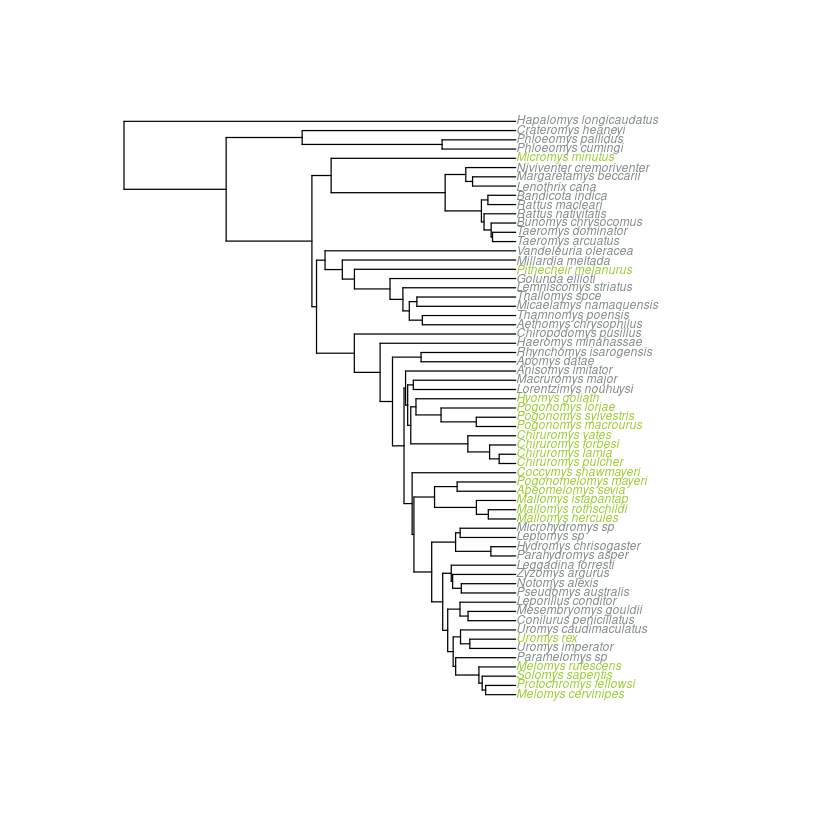

In [50]:
for (i in 4:9){
    pancova(df[,c(i,10)], phy)
}

In [42]:
categorical_trait<-df$Prehensility
continuous_trait<-df$Proxy_size
names(categorical_trait)<-df$Genus_species
names(continuous_trait)<-df$Genus_species

In [43]:
phanov<-phylANOVA(phy, categorical_trait, continuous_trait, nsim=10000, posthoc=TRUE, p.adj="bonferroni")

In [27]:
phanov

ANOVA table: Phylogenetic ANOVA

Response: y
             Sum Sq  Mean Sq  F value Pr(>F)
x          1.123121 1.123121 0.576527 0.6997
Residual 122.728993 1.948079                

P-value based on simulation.
---------

Pairwise posthoc test using method = "bonferroni"

Pairwise t-values:
         N         P
N 0.000000 -0.759294
P 0.759294  0.000000

Pairwise corrected P-values:
       N      P
N 1.0000 0.6997
P 0.6997 1.0000
---------


In [24]:
phanov

ANOVA table: Phylogenetic ANOVA

Response: y
            Sum Sq   Mean Sq   F value Pr(>F)
x         9514.663 9514.6632 54.281625  1e-04
Residual 11042.849  175.2833                 

P-value based on simulation.
---------

Pairwise posthoc test using method = "bonferroni"

Pairwise t-values:
         N         P
N 0.000000 -7.367606
P 7.367606  0.000000

Pairwise corrected P-values:
      N     P
N 1e+00 1e-04
P 1e-04 1e+00
---------


In [17]:
phanov

ANOVA table: Phylogenetic ANOVA

Response: y
           Sum Sq   Mean Sq   F value Pr(>F)
x         8763.94 8763.9403 51.547342  1e-04
Residual 10711.09  170.0173                 

P-value based on simulation.
---------

Pairwise posthoc test using method = "bonferroni"

Pairwise t-values:
         N         P
N 0.000000 -7.179648
P 7.179648  0.000000

Pairwise corrected P-values:
      N     P
N 1e+00 1e-04
P 1e-04 1e+00
---------


In [19]:
phanov$

ANOVA table: Phylogenetic ANOVA

Response: y
           Sum Sq  Mean Sq   F value Pr(>F)
x        4.735562 4.735562 38.206037  1e-04
Residual 7.808724 0.123948                 

P-value based on simulation.
---------

Pairwise posthoc test using method = "bonferroni"

Pairwise t-values:
         N         P
N 0.000000 -6.181103
P 6.181103  0.000000

Pairwise corrected P-values:
      N     P
N 1e+00 1e-04
P 1e-04 1e+00
---------
